# EDA Analisis

### 📚 Libreries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np


### Input cleaned Csvs.

In [2]:
coin_id_df = pd.read_csv('../Csvs_cleanned/coin_id.csv')
coins_global_trends_df = pd.read_csv('../Csvs_cleanned/coins_global_trends.csv')
# normalized_tickers_resume_df = pd.read_csv('../Csvs_cleanned/normalized_tickers_resume.csv')
ohlc_prices_df = pd.read_csv('../Csvs_cleanned/ohlc_prices.csv')
prices_df = pd.read_csv('../Csvs_cleanned/prices.csv')
# prices_normalized_df = pd.read_csv('../Csvs_cleanned/prices_normalized.csv')
ranking_coingecko_df = pd.read_csv('../Csvs_cleanned/ranking_coingecko.csv')
tickers_resume_df = pd.read_csv('../Csvs_cleanned/tickers_resume.csv')
top_criptos_df = pd.read_csv('../Csvs_cleanned/top_criptos.csv')


In [3]:
df_bit = pd.read_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/df_bit.csv')
df_eth = pd.read_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/df_eth.csv')

###  🪙📚 coin_id_df:

In [4]:
coin_id_df.head(15)

,crip_id,symbol,name
0,apecoin,ape,apecoin
1,apemove,ape,apemove
2,bella-protocol,bel,bella protocol
3,binancecoin,bnb,bnb
4,binance-coin-wormhole,bnb,binance coin (wormhole)
5,binance-peg-cardano,ada,binance-peg cardano
6,binance-peg-dogecoin,doge,binance-peg dogecoin
7,binance-peg-xrp,xrp,binance-peg xrp
8,bitcoin,btc,bitcoin
9,bonk,bonk,bonk


### coins_global_trends_df:

In [5]:
coins_global_trends_df.head(15)

,crip_id,coin_id,name,symbol,market_cap_rank,thumb,small,large,slug,price_btc,score
0,bella-protocol,12478,bella protocol,bel,496,https://assets.coingecko.com/coins/images/1247...,https://assets.coingecko.com/coins/images/1247...,https://assets.coingecko.com/coins/images/1247...,bella-protocol,2.230662e-05,7
1,bonk,28600,bonk,bonk,911,https://assets.coingecko.com/coins/images/2860...,https://assets.coingecko.com/coins/images/2860...,https://assets.coingecko.com/coins/images/2860...,bonk,8.921877e-12,6
2,tamadoge,27501,tamadoge,tama,863,https://assets.coingecko.com/coins/images/2750...,https://assets.coingecko.com/coins/images/2750...,https://assets.coingecko.com/coins/images/2750...,tamadoge,4.159892e-07,5
3,the-sandbox,12129,the sandbox,sand,58,https://assets.coingecko.com/coins/images/1212...,https://assets.coingecko.com/coins/images/1212...,https://assets.coingecko.com/coins/images/1212...,the-sandbox,1.192657e-05,4
4,matic-network,4713,polygon,matic,14,https://assets.coingecko.com/coins/images/4713...,https://assets.coingecko.com/coins/images/4713...,https://assets.coingecko.com/coins/images/4713...,polygon,2.177951e-05,3
5,apecoin,24383,apecoin,ape,72,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,https://assets.coingecko.com/coins/images/2438...,apecoin,5.242338e-05,2
6,gala,12493,gala,gala,85,https://assets.coingecko.com/coins/images/1249...,https://assets.coingecko.com/coins/images/1249...,https://assets.coingecko.com/coins/images/1249...,gala,6.299715e-07,1


In [6]:
coins_global_trends_df = coins_global_trends_df[['crip_id','name','market_cap_rank','price_btc','score']]

In [7]:
# Ordenar el DataFrame por la columna 'score' de manera descendente
sorted_coins_global_trends_df = coins_global_trends_df.sort_values(by='score', ascending=True)


In [8]:
sorted_coins_global_trends_df.head()

,crip_id,name,market_cap_rank,price_btc,score
6,gala,gala,85,6.299715e-07,1
5,apecoin,apecoin,72,5.242338e-05,2
4,matic-network,polygon,14,2.177951e-05,3
3,the-sandbox,the sandbox,58,1.192657e-05,4
2,tamadoge,tamadoge,863,4.159892e-07,5


### ohlc_prices_df:

In [9]:
ohlc_prices_df.head(15)

,timestamp,open_price,high_price,low_price,close_price,crip_id
0,2023-08-07 04:00:00,23.47155,23.47155,23.39152,23.39152,solana
1,2023-08-07 08:00:00,23.26650,23.30863,23.00660,23.00660,solana
2,2023-08-07 12:00:00,23.07197,23.07635,23.01498,23.07635,solana
3,2023-08-07 16:00:00,23.03785,23.10701,22.79348,22.79348,solana
4,2023-08-07 20:00:00,22.70763,22.84643,22.56320,22.84643,solana
5,2023-08-08 00:00:00,22.88505,22.99592,22.88505,22.99339,solana
6,2023-08-08 04:00:00,23.05200,23.11911,23.02586,23.04836,solana
7,2023-08-08 08:00:00,23.10364,23.26432,23.10364,23.26432,solana
8,2023-08-08 12:00:00,23.20538,23.27126,23.15312,23.27126,solana
9,2023-08-08 16:00:00,23.29182,23.45689,23.20280,23.33134,solana


In [10]:
ohlc_prices_df.shape

(6404, 6)

In [11]:
ohlc_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6404 entries, 0 to 6403
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    6404 non-null   object 
 1   open_price   6404 non-null   float64
 2   high_price   6404 non-null   float64
 3   low_price    6404 non-null   float64
 4   close_price  6404 non-null   float64
 5   crip_id      6404 non-null   object 
dtypes: float64(4), object(2)
memory usage: 300.3+ KB


In [12]:
# Convertir la columna 'timestamp' a tipo datetime
ohlc_prices_df['timestamp'] = pd.to_datetime(ohlc_prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
ohlc_prices_df = ohlc_prices_df.sort_values(by=['crip_id', 'timestamp'])

# Calcular los incrementos porcentuales respecto al valor anterior para las columnas de precio
price_columns = ['open_price', 'high_price', 'low_price', 'close_price']
for column in price_columns:
    ohlc_prices_df[f'{column}_percent_increment'] = ohlc_prices_df.groupby('crip_id')[column].pct_change()


In [13]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment
855,2023-08-07 04:00:00,1.87251,1.87870,1.87251,1.87870,apecoin,NaN,NaN,NaN,NaN
856,2023-08-07 08:00:00,1.88563,1.93890,1.83644,1.83644,apecoin,0.007007,0.032043,-0.019263,-0.022494
857,2023-08-07 12:00:00,1.84909,1.85777,1.84356,1.85757,apecoin,-0.019378,-0.041843,0.003877,0.011506
858,2023-08-07 16:00:00,1.85353,1.85353,1.83431,1.83431,apecoin,0.002401,-0.002282,-0.005017,-0.012522
859,2023-08-07 20:00:00,1.82164,1.82164,1.78960,1.80748,apecoin,-0.017205,-0.017205,-0.024374,-0.014627


In [14]:
ohlc_prices_df = ohlc_prices_df.fillna(0)

### ohlc_prices_df_increments %:

In [15]:
ohlc_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/ohlc_prices_df_increments.csv', mode='w', index=False)

In [16]:
ohlc_prices_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment
855,2023-08-07 04:00:00,1.87251,1.87870,1.87251,1.87870,apecoin,0.000000,0.000000,0.000000,0.000000
856,2023-08-07 08:00:00,1.88563,1.93890,1.83644,1.83644,apecoin,0.007007,0.032043,-0.019263,-0.022494
857,2023-08-07 12:00:00,1.84909,1.85777,1.84356,1.85757,apecoin,-0.019378,-0.041843,0.003877,0.011506
858,2023-08-07 16:00:00,1.85353,1.85353,1.83431,1.83431,apecoin,0.002401,-0.002282,-0.005017,-0.012522
859,2023-08-07 20:00:00,1.82164,1.82164,1.78960,1.80748,apecoin,-0.017205,-0.017205,-0.024374,-0.014627


_____________________________________________

#### jugando con transpuesta:

In [17]:
ohlc_prices_df_t = ohlc_prices_df.T

In [18]:
ohlc_prices_df_t.head(10)

,855,856,857,858,859,860,861,862,863,864,...,4311,4312,4313,4314,4315,4316,4317,4318,4319,4320
timestamp,2023-08-07 04:00:00,2023-08-07 08:00:00,2023-08-07 12:00:00,2023-08-07 16:00:00,2023-08-07 20:00:00,2023-08-08 00:00:00,2023-08-08 04:00:00,2023-08-08 08:00:00,2023-08-08 12:00:00,2023-08-08 16:00:00,...,2023-09-04 16:00:00,2023-09-04 20:00:00,2023-09-05 00:00:00,2023-09-05 04:00:00,2023-09-05 08:00:00,2023-09-05 12:00:00,2023-09-05 16:00:00,2023-09-05 20:00:00,2023-09-06 00:00:00,2023-09-06 04:00:00
open_price,1.87251,1.88563,1.84909,1.85353,1.82164,1.80904,1.81868,1.81332,1.81871,1.83039,...,19.63164,19.41859,19.40622,19.45537,19.13964,19.36609,19.49184,20.35951,20.32493,20.24475
high_price,1.8787,1.9389,1.85777,1.85353,1.82164,1.8188,1.81868,1.82386,1.82716,1.83605,...,19.63164,19.44546,19.42422,19.45537,19.27709,19.53896,20.1997,20.44316,20.32493,20.24475
low_price,1.87251,1.83644,1.84356,1.83431,1.7896,1.80904,1.80448,1.81332,1.81871,1.82997,...,19.48043,19.38382,19.29111,19.19608,19.13964,19.32969,19.49184,20.25555,20.14369,20.21742
close_price,1.8787,1.83644,1.85757,1.83431,1.80748,1.8188,1.80974,1.82325,1.82716,1.83435,...,19.51832,19.44546,19.29111,19.19608,19.27709,19.53896,20.1997,20.25555,20.25237,20.21742
crip_id,apecoin,apecoin,apecoin,apecoin,apecoin,apecoin,apecoin,apecoin,apecoin,apecoin,...,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana,wrapped-solana
open_price_percent_increment,0.0,0.007007,-0.019378,0.002401,-0.017205,-0.006917,0.005329,-0.002947,0.002972,0.006422,...,-0.007481,-0.010852,-0.000637,0.002533,-0.016228,0.011831,0.006493,0.044515,-0.001698,-0.003945
high_price_percent_increment,0.0,0.032043,-0.041843,-0.002282,-0.017205,-0.001559,-0.000066,0.002848,0.001809,0.004865,...,-0.008487,-0.009484,-0.001092,0.001604,-0.009164,0.013585,0.033817,0.012053,-0.005783,-0.003945
low_price_percent_increment,0.0,-0.019263,0.003877,-0.005017,-0.024374,0.010863,-0.002521,0.004899,0.002972,0.006191,...,-0.012868,-0.004959,-0.004783,-0.004926,-0.00294,0.00993,0.008389,0.039181,-0.005522,0.00366
close_price_percent_increment,0.0,-0.022494,0.011506,-0.012522,-0.014627,0.006263,-0.004981,0.007465,0.002145,0.003935,...,-0.010948,-0.003733,-0.007938,-0.004926,0.00422,0.013585,0.033817,0.002765,-0.000157,-0.001726


#### Jugando con pivot:

In [19]:
# Realizar la pivoteación
pivoted_ohlc_prices_df = ohlc_prices_df.pivot(index='timestamp', columns='crip_id', values=[
    'open_price', 'high_price', 'low_price', 'close_price',
    'open_price_percent_increment', 'high_price_percent_increment', 'low_price_percent_increment', 'close_price_percent_increment'
])

In [20]:
pivoted_ohlc_prices_df.head(10)

open_price                                                \
crip_id                apecoin  apemove bella-protocol binance-coin-wormhole   
timestamp                                                                      
2023-08-07 04:00:00    1.87251  0.00659        0.66459             234.02642   
2023-08-07 08:00:00    1.88563  0.00658        0.66292             235.13527   
2023-08-07 12:00:00    1.84909  0.00659        0.66054             236.34383   
2023-08-07 16:00:00    1.85353      NaN        0.66672             236.09474   
2023-08-07 20:00:00    1.82164  0.00660        0.65407             240.81371   
2023-08-08 00:00:00    1.80904  0.00660        0.65558             230.29727   
2023-08-08 04:00:00    1.81868  0.00665        0.65607             230.20255   
2023-08-08 08:00:00    1.81332  0.00661        0.65232             240.29607   
2023-08-08 12:00:00    1.81871  0.00662        0.64824             240.80088   
2023-08-08 16:00:00    1.83039      NaN        0.64899             241.39878   

                                                                              \
crip_id             binance-peg-cardano binance-peg-dogecoin binance-peg-xrp   
timestamp                                                                      
2023-08-07 04:00:00             0.29445              0.07491         0.62584   
2023-08-07 08:00:00             0.29347              0.07512         0.62429   
2023-08-07 12:00:00             0.29069              0.07437         0.61094   
2023-08-07 16:00:00             0.29176              0.07467         0.61814   
2023-08-07 20:00:00             0.28801              0.07356         0.61564   
2023-08-08 00:00:00             0.28743              0.07321         0.61508   
2023-08-08 04:00:00             0.29043              0.07358         0.61904   
2023-08-08 08:00:00             0.29021              0.07369         0.61869   
2023-08-08 12:00:00             0.29125              0.07323         0.62031   
2023-08-08 16:00:00             0.29312              0.07372         0.61908   

                                                   ...  \
crip_id             binancecoin      bitcoin bonk  ...   
timestamp                                          ...   
2023-08-07 04:00:00   244.15530  29094.93776  0.0  ...   
2023-08-07 08:00:00   243.23789  29106.42474  0.0  ...   
2023-08-07 12:00:00   242.34425  29019.62060  0.0  ...   
2023-08-07 16:00:00   241.97019  29031.58657  0.0  ...   
2023-08-07 20:00:00   240.73926  28803.77343  0.0  ...   
2023-08-08 00:00:00   241.17387  29070.22569  0.0  ...   
2023-08-08 04:00:00   241.73842  29178.14775  0.0  ...   
2023-08-08 08:00:00   242.07445  29157.50729  0.0  ...   
2023-08-08 12:00:00   242.58777  29156.63525  0.0  ...   
2023-08-08 16:00:00   243.29699  29321.57520  0.0  ...   

                    close_price_percent_increment                              \
crip_id                                  tamadoge    tether tether-pulsechain   
timestamp                                                                       
2023-08-07 04:00:00                      0.000000  0.000000          0.000000   
2023-08-07 08:00:00                      0.017857       NaN          0.003085   
2023-08-07 12:00:00                      0.015351 -0.000851         -0.006576   
2023-08-07 16:00:00                     -0.010799  0.000220          0.004111   
2023-08-07 20:00:00                     -0.009825  0.000881         -0.014572   
2023-08-08 00:00:00                      0.009923 -0.000791          0.012665   
2023-08-08 04:00:00                      0.001092 -0.000070         -0.007818   
2023-08-08 08:00:00                     -0.002181  0.000080          0.010933   
2023-08-08 12:00:00                     -0.007650       NaN         -0.000158   
2023-08-08 16:00:00                     -0.001101       NaN         -0.005646   

                                                               \
crip_id             the-sandbox the-sandbox-wormhole usd-coin   

___________________________________

### prices_df:

In [21]:
prices_df.head(15)

,crip_id,timestamp,price,market_cap,total_volume
0,solana,2023-03-27 00:00:00,20.98229,8.079230e+09,326327780.0
1,solana,2023-03-28 00:00:00,19.95754,7.655292e+09,406232830.0
2,solana,2023-03-29 00:00:00,20.49934,7.878766e+09,400868500.0
3,solana,2023-03-30 00:00:00,21.13233,8.122142e+09,422168350.0
4,solana,2023-03-31 00:00:00,20.57440,7.919320e+09,532521000.0
5,solana,2023-04-01 00:00:00,21.20540,8.194996e+09,415947400.0
6,solana,2023-04-02 00:00:00,21.08350,8.133720e+09,251948590.0
7,solana,2023-04-03 00:00:00,20.56544,7.929638e+09,250939730.0
8,solana,2023-04-04 00:00:00,20.43669,7.900169e+09,529752900.0
9,solana,2023-04-05 00:00:00,20.92110,8.093519e+09,348472960.0


In [22]:
prices_df.shape

(5622, 5)

In [23]:
# Convertir la columna 'timestamp' a tipo datetime
prices_df['timestamp'] = pd.to_datetime(prices_df['timestamp'])

# Ordenar el DataFrame por 'crip_id' y 'timestamp'
prices_df = prices_df.sort_values(by=['crip_id', 'timestamp'])

prices_df['price_percent_increment'] = prices_df.groupby('crip_id')['price'].pct_change() 
prices_df['market_cap_percent_increment'] = prices_df.groupby('crip_id')['market_cap'].pct_change() 
prices_df['total_volume_percent_increment'] = prices_df.groupby('crip_id')['total_volume'].pct_change()

In [24]:
prices_df = prices_df.fillna(0)

In [25]:
prices_df.head()

,crip_id,timestamp,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment
626,apecoin,2023-03-27,4.11099,1.520238e+09,92780660.0,0.000000,0.000000,0.000000
627,apecoin,2023-03-28,3.92616,1.444861e+09,131185590.0,-0.044960,-0.049582,0.413932
628,apecoin,2023-03-29,4.07924,1.501886e+09,137067020.0,0.038990,0.039468,0.044833
629,apecoin,2023-03-30,4.12149,1.519046e+09,120195510.0,0.010357,0.011426,-0.123089
630,apecoin,2023-03-31,4.06088,1.493602e+09,110339100.0,-0.014706,-0.016751,-0.082003


#### Guardo prices_df_increments

In [26]:
prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/prices_df_increments.csv', mode='w',index=False)

In [27]:
prices_df.head(167)

,crip_id,timestamp,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment
626,apecoin,2023-03-27 00:00:00,4.11099,1.520238e+09,9.278066e+07,0.000000,0.000000,0.000000
627,apecoin,2023-03-28 00:00:00,3.92616,1.444861e+09,1.311856e+08,-0.044960,-0.049582,0.413932
628,apecoin,2023-03-29 00:00:00,4.07924,1.501886e+09,1.370670e+08,0.038990,0.039468,0.044833
629,apecoin,2023-03-30 00:00:00,4.12149,1.519046e+09,1.201955e+08,0.010357,0.011426,-0.123089
630,apecoin,2023-03-31 00:00:00,4.06088,1.493602e+09,1.103391e+08,-0.014706,-0.016751,-0.082003
...,...,...,...,...,...,...,...,...
788,apecoin,2023-09-05 00:00:00,1.34486,4.951116e+08,4.385347e+07,-0.008859,-0.012094,-0.040632
789,apecoin,2023-09-05 19:37:58,1.35258,4.987729e+08,3.354358e+07,0.005740,0.007395,-0.235099
2063,apemove,2023-03-27 00:00:00,0.00523,1.024444e+04,1.645390e+01,0.000000,0.000000,0.000000
2064,apemove,2023-03-28 00:00:00,0.00517,1.009133e+04,1.658633e+01,-0.011472,-0.014946,0.008049


In [28]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5622 entries, 626 to 3922
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   crip_id                         5622 non-null   object        
 1   timestamp                       5622 non-null   datetime64[ns]
 2   price                           5622 non-null   float64       
 3   market_cap                      5622 non-null   float64       
 4   total_volume                    5622 non-null   float64       
 5   price_percent_increment         5622 non-null   float64       
 6   market_cap_percent_increment    5622 non-null   float64       
 7   total_volume_percent_increment  5622 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 395.3+ KB


In [29]:
# sns.pairplot(prices_df, hue='crip_id')

### Merged Ohlc_prices_df y Prices_df:

##### Merge

In [30]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df = pd.merge(ohlc_prices_df, prices_df, on=['crip_id', 'timestamp'])

In [31]:
merged_df_ohlc_prices_df_and_prices_df.head(10)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment
0,2023-08-08,1.80904,1.81880,1.80904,1.81880,apecoin,-0.006917,-0.001559,0.010863,0.006263,1.81868,669830600.0,99694070.0,-0.020329,-0.020904,-0.347052
1,2023-08-09,1.84630,1.87336,1.84630,1.85713,apecoin,0.000428,0.013997,0.001247,0.007120,1.86171,686071100.0,73782136.0,0.023660,0.024246,-0.259914
2,2023-08-10,1.82671,1.83112,1.82542,1.83002,apecoin,-0.003671,-0.001265,0.003419,0.003862,1.83699,677121300.0,48435070.0,-0.013278,-0.013045,-0.343539
3,2023-08-11,1.85098,1.87627,1.85098,1.86610,apecoin,0.002063,0.010693,0.002063,0.005214,1.87021,689575700.0,49481452.0,0.018084,0.018393,0.021604
4,2023-08-12,1.87605,1.89117,1.87605,1.89111,apecoin,0.014306,0.001053,0.014306,0.005974,1.90294,701118400.0,61675630.0,0.017501,0.016739,0.246439
5,2023-08-13,2.01446,2.02963,2.01331,2.01711,apecoin,0.004247,0.007826,0.007738,0.001609,2.01369,740804200.0,155449660.0,0.058199,0.056604,1.520439
6,2023-08-14,2.01922,2.01922,1.98942,1.98942,apecoin,0.014648,0.004582,-0.000327,-0.008245,2.00305,735512260.0,107841020.0,-0.005284,-0.007144,-0.306264
7,2023-08-15,2.06487,2.07560,2.06487,2.06564,apecoin,-0.016635,-0.011525,0.000649,0.001023,2.05775,759791200.0,128609570.0,0.027308,0.033010,0.192585
8,2023-08-16,1.85293,1.85293,1.83025,1.84873,apecoin,-0.073604,-0.073604,-0.073648,-0.064294,1.84371,679107800.0,105204640.0,-0.104017,-0.106192,-0.181984
9,2023-08-17,1.79786,1.79786,1.69396,1.71206,apecoin,-0.006070,-0.007294,-0.058718,-0.051133,1.72705,638397630.0,92594424.0,-0.063275,-0.059947,-0.119864


In [32]:
merged_df_ohlc_prices_df_and_prices_df.shape

(1034, 16)

In [33]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df,hue='crip_id')

##### Guardo merged_df_ohlc_prices_df_and_prices_df:

In [34]:
merged_df_ohlc_prices_df_and_prices_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_df_ohlc_prices_df_and_prices_df.csv', mode='w', index=False)

##### merged_df_ohlc_prices_df_and_prices_df % :

In [35]:
# # Calculate percentage change for the specified columns
# percentage_columns = ["open_price", "high_price", "low_price", "close_price", "price", 'market_cap', 'total_volume']
# for col in percentage_columns:
#     col_name = f"{col}_change"
#     merged_df_ohlc_prices_df_and_prices_df[col_name] = merged_df_ohlc_prices_df_and_prices_df[col].pct_change() * 100

# # Display the resulting DataFrame
# print(merged_df_ohlc_prices_df_and_prices_df.head(10))


In [36]:
# # Display the resulting DataFrame
# merged_df_ohlc_prices_df_and_prices_df.shape

In [37]:
# sns.pairplot(merged_df_ohlc_prices_df_and_prices_df, hue='crip_id')

### ranking_coingecko_df:

In [38]:
ranking_coingecko_df.head(15)

,crip_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,solana,0,75.56,24.44,555711,10.0,4.0,65.857,89.605,50.646,74.593,0.104,2023-09-06 01:44:13.816000+00:00,NaN,NaN
1,heco-peg-xrp,0,0.00,0.00,118,0.0,6302.0,0.201,0.000,0.000,1.000,0.022,2023-09-06 01:43:00.682000+00:00,huobi-token,NaN
2,binance-peg-xrp,0,0.00,0.00,1654,0.0,3172.0,9.289,0.000,12.520,32.667,0.022,2023-09-06 01:44:17.568000+00:00,binance-smart-chain,NaN
3,harrypotterobamapacman8inu,0,83.33,16.67,801,526.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-09-06 01:44:21.369000+00:00,ethereum,NaN
4,usd-coin-pulsechain,0,0.00,0.00,94,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-09-06 01:41:47.005000+00:00,pulsechain,NaN
5,apecoin,0,61.36,38.64,92809,72.0,309.0,32.451,0.000,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
6,the-sandbox,0,62.22,37.78,259447,58.0,349.0,31.226,0.000,11.784,64.385,0.163,2023-09-06 01:44:25.466000+00:00,ethereum,NaN
7,bridged-usd-coin-linea,0,0.00,0.00,20,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-09-06 01:44:23.892000+00:00,linea,NaN
8,tether-pulsechain,0,0.00,0.00,208,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-09-06 01:44:41.876000+00:00,pulsechain,NaN
9,usd-coin,0,66.67,33.33,110082,6.0,28.0,53.898,63.076,9.747,87.410,0.033,2023-09-06 01:45:27.326000+00:00,ethereum,NaN


In [39]:
ranking_coingecko_df.shape

(43, 15)

In [40]:
ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   crip_id                          43 non-null     object 
 1   block_time_in_minutes            43 non-null     int64  
 2   sentiment_votes_up_percentage    43 non-null     float64
 3   sentiment_votes_down_percentage  43 non-null     float64
 4   watchlist_portfolio_users        43 non-null     int64  
 5   market_cap_rank                  43 non-null     float64
 6   coingecko_rank                   43 non-null     float64
 7   coingecko_score                  43 non-null     float64
 8   developer_score                  43 non-null     float64
 9   community_score                  43 non-null     float64
 10  liquidity_score                  43 non-null     float64
 11  public_interest_score            43 non-null     float64
 12  last_updated            

In [41]:
ranking_coingecko_df.head()

,crip_id,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,solana,0,75.56,24.44,555711,10.0,4.0,65.857,89.605,50.646,74.593,0.104,2023-09-06 01:44:13.816000+00:00,NaN,NaN
1,heco-peg-xrp,0,0.00,0.00,118,0.0,6302.0,0.201,0.000,0.000,1.000,0.022,2023-09-06 01:43:00.682000+00:00,huobi-token,NaN
2,binance-peg-xrp,0,0.00,0.00,1654,0.0,3172.0,9.289,0.000,12.520,32.667,0.022,2023-09-06 01:44:17.568000+00:00,binance-smart-chain,NaN
3,harrypotterobamapacman8inu,0,83.33,16.67,801,526.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-09-06 01:44:21.369000+00:00,ethereum,NaN
4,usd-coin-pulsechain,0,0.00,0.00,94,0.0,0.0,0.000,0.000,0.000,0.000,0.000,2023-09-06 01:41:47.005000+00:00,pulsechain,NaN


In [42]:
# sns.pairplot(ranking_coingecko_df,hue='crip_id')

### Merged with ranking_congecko_df: Solo se puede por crip_id

In [43]:
# Realizar el merge utilizando 'crip_id' y 'date'
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = pd.merge(merged_df_ohlc_prices_df_and_prices_df, ranking_coingecko_df, on=['crip_id'])

In [44]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,...,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,2023-08-08,1.80904,1.81880,1.80904,1.81880,apecoin,-0.006917,-0.001559,0.010863,0.006263,...,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
1,2023-08-09,1.84630,1.87336,1.84630,1.85713,apecoin,0.000428,0.013997,0.001247,0.007120,...,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
2,2023-08-10,1.82671,1.83112,1.82542,1.83002,apecoin,-0.003671,-0.001265,0.003419,0.003862,...,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
3,2023-08-11,1.85098,1.87627,1.85098,1.86610,apecoin,0.002063,0.010693,0.002063,0.005214,...,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
4,2023-08-12,1.87605,1.89117,1.87605,1.89111,apecoin,0.014306,0.001053,0.014306,0.005974,...,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN


In [45]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.shape

(1092, 30)

In [46]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [47]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.head(5)

,timestamp,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice
0,2023-08-08,1.80904,1.81880,1.80904,1.81880,apecoin,-0.006917,-0.001559,0.010863,0.006263,1.81868,669830600.0,99694070.0,-0.020329,-0.020904,-0.347052,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
1,2023-08-09,1.84630,1.87336,1.84630,1.85713,apecoin,0.000428,0.013997,0.001247,0.007120,1.86171,686071100.0,73782136.0,0.023660,0.024246,-0.259914,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
2,2023-08-10,1.82671,1.83112,1.82542,1.83002,apecoin,-0.003671,-0.001265,0.003419,0.003862,1.83699,677121300.0,48435070.0,-0.013278,-0.013045,-0.343539,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
3,2023-08-11,1.85098,1.87627,1.85098,1.86610,apecoin,0.002063,0.010693,0.002063,0.005214,1.87021,689575700.0,49481452.0,0.018084,0.018393,0.021604,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN
4,2023-08-12,1.87605,1.89117,1.87605,1.89111,apecoin,0.014306,0.001053,0.014306,0.005974,1.90294,701118400.0,61675630.0,0.017501,0.016739,0.246439,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN


In [48]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.drop_duplicates()

In [49]:
# Contar la cantidad de veces que aparece cada valor único en 'Columna'
count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df['crip_id'].value_counts()

In [50]:
print(count_crip_id_merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df)

crip_id
ethereum                             58
bitcoin                              58
binancecoin                          30
matic-network                        30
apecoin                              29
usd-coin-pulsechain                  29
the-sandbox-wormhole                 29
the-sandbox                          29
staked-ether                         29
solana                               29
sol-wormhole                         29
ripple                               29
heco-peg-xrp                         29
gala                                 29
ethereum-wormhole                    29
wrapped-solana                       29
dogecoin                             29
bonk                                 29
bella-protocol                       29
binance-coin-wormhole                29
binance-peg-cardano                  29
doge-on-pulsechain                   29
binance-peg-xrp                      29
binance-peg-dogecoin                 29
cardano                         

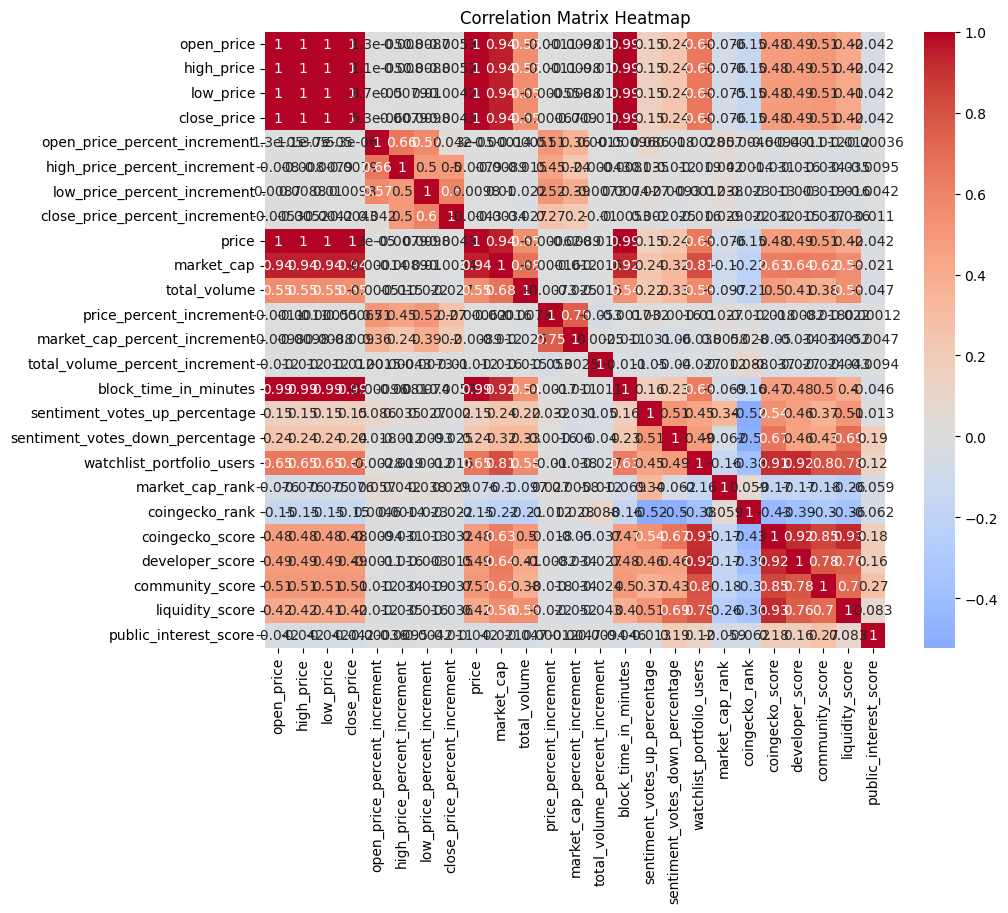

In [51]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



___________________________________________________________________

### Experimentando otro poco

In [52]:
merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   timestamp                        1092 non-null   datetime64[ns]
 1   open_price                       1092 non-null   float64       
 2   high_price                       1092 non-null   float64       
 3   low_price                        1092 non-null   float64       
 4   close_price                      1092 non-null   float64       
 5   crip_id                          1092 non-null   object        
 6   open_price_percent_increment     1092 non-null   float64       
 7   high_price_percent_increment     1092 non-null   float64       
 8   low_price_percent_increment      1092 non-null   float64       
 9   close_price_percent_increment    1092 non-null   float64       
 10  price                            1092 non-null   float64    

________________________________________________________________________________

### tickers_resume_df:

In [53]:
tickers_resume_df.head(10)

,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,crip_id,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,sol,usdt,20.2200,1.214550e+05,green,0.049407,2023-09-06 01:55:31,2023-09-06 01:55:31,2023-09-06 01:58:12,False,False,https://bingx.com/en-us/spot/solusdt,not founded token_info_url #404,solana,tether,bingx,bingx,0.000784,0.012376,20.21,93.726000,1479.00,2415871.0
1,sol,usdt,20.2200,9.142248e+04,green,0.049407,2023-09-06 01:57:15,2023-09-06 01:57:15,2023-09-06 01:57:15,False,False,https://www.mexc.com/exchange/sol_usdt,not founded token_info_url #404,solana,tether,mexc,mxc,0.000784,0.012376,20.21,71.690000,1131.00,1847827.0
2,sol,usdt,20.2400,4.254184e+06,green,0.049407,2023-09-06 01:58:01,2023-09-06 01:58:01,2023-09-06 01:58:01,False,False,https://www.binance.com/en/trade/sol_usdt?ref=...,not founded token_info_url #404,solana,tether,binance,binance,0.000785,0.012388,20.23,3281.000000,51778.00,84563757.0
3,sol,usdt,20.2290,8.478971e+05,green,0.019880,2023-09-06 01:59:06,2023-09-06 01:59:06,2023-09-06 01:59:06,False,False,https://www.digifinex.com/en-ww/trade/usdt/sol,not founded token_info_url #404,solana,tether,digifinex,digifinex,0.000785,0.012383,20.22,665.250000,10500.00,17146975.0
4,sol,usd,20.2140,1.411092e+05,green,0.093832,2023-09-06 01:59:19,2023-09-06 01:59:19,2023-09-06 01:59:19,False,False,https://www.btse.com/en/trading/sol-usd,not founded token_info_url #404,solana,usd,btse,btse,0.000784,0.012378,20.21,110.664000,1747.00,2852381.0
5,sol,usd,20.2300,9.089884e+05,green,0.049432,2023-09-06 01:59:23,2023-09-06 01:59:23,2023-09-06 01:59:23,False,False,https://pro.coinbase.com/trade/sol-usd,not founded token_info_url #404,solana,usd,coinbase exchange,gdax,0.000785,0.012387,20.23,713.431000,11260.00,18388836.0
6,sol,usdt,20.2300,2.426604e+04,green,0.246914,2023-09-06 01:58:24,2023-09-06 01:58:24,2023-09-06 01:58:24,False,False,https://www.cointr.com/en-us/spot/sol_usdt,not founded token_info_url #404,solana,tether,cointr pro,cointr,0.000785,0.012382,20.22,18.795561,296.64,484474.0
7,sol,usdt,20.2343,2.391212e+05,green,0.040520,2023-09-06 01:59:17,2023-09-06 01:59:17,2023-09-06 01:59:17,False,False,https://whitebit.com/trade/sol_usdt,not founded token_info_url #404,solana,tether,whitebit,whitebit,0.000785,0.012386,20.23,187.661000,2962.00,4837002.0
8,sol,usdt,20.2307,2.131734e+05,green,0.083995,2023-09-06 01:58:35,2023-09-06 01:58:35,2023-09-06 01:58:35,False,False,https://www.pionex.com/en/trade/sol_usdt/bot,not founded token_info_url #404,solana,tether,pionex,pionex,0.000785,0.012383,20.22,164.431000,2595.00,4238359.0
9,sol,usd,20.2200,6.666524e+05,green,0.049456,2023-09-06 01:58:46,2023-09-06 01:58:46,2023-09-06 01:58:46,False,False,https://pro.kraken.com/app/trade/sol-usd,not founded token_info_url #404,solana,usd,kraken,kraken,0.000784,0.012381,20.22,522.956000,8254.00,13479711.0


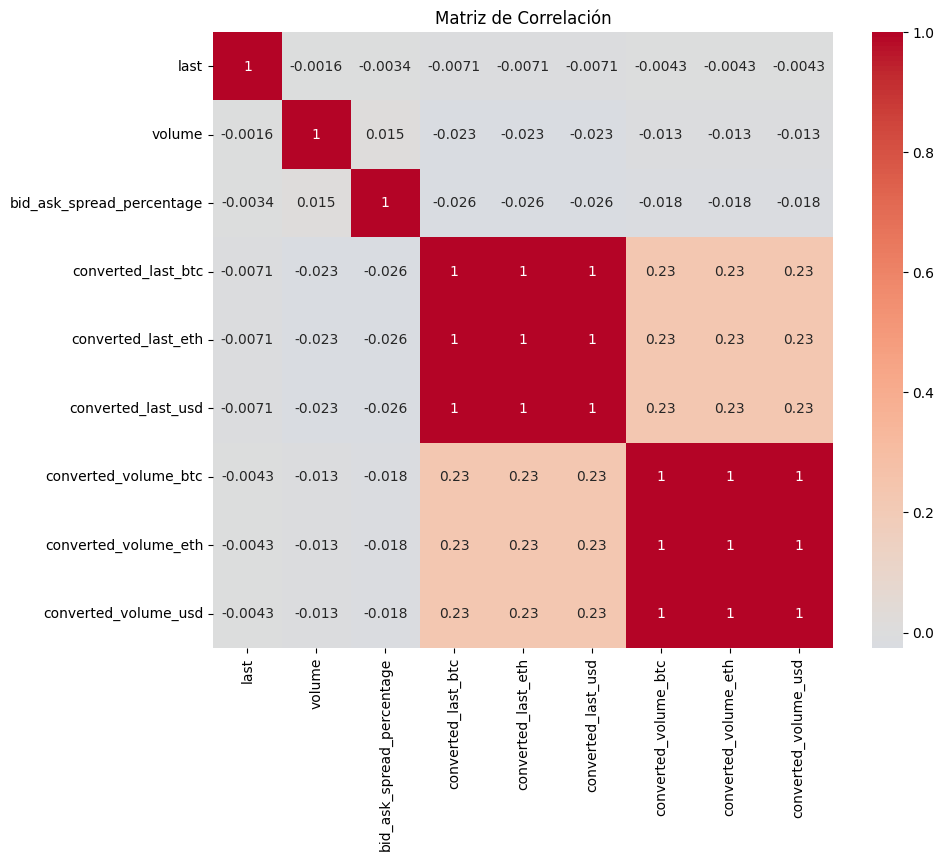

In [54]:
numeric_columns = tickers_resume_df.select_dtypes(include=['float64', 'int64','int32','float32'])  # Seleccionar solo columnas numéricas
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()


________________________________

### algunos experimentos para el merge, timestamp mas proximo

In [55]:
# Realizar el merge
merged_result = pd.merge(merged_df_ohlc_prices_df_and_prices_df_and_ranking_coingecko_df, tickers_resume_df, on=["crip_id"])

In [56]:
# Imprimir el resultado
merged_result.head(5)

,timestamp_x,open_price,high_price,low_price,close_price,crip_id,open_price_percent_increment,high_price_percent_increment,low_price_percent_increment,close_price_percent_increment,price,market_cap,total_volume,price_percent_increment,market_cap_percent_increment,total_volume_percent_increment,block_time_in_minutes,sentiment_votes_up_percentage,sentiment_votes_down_percentage,watchlist_portfolio_users,market_cap_rank,coingecko_rank,coingecko_score,developer_score,community_score,liquidity_score,public_interest_score,last_updated,asset_platform_id,public_notice,base,target,last,volume,trust_score,bid_ask_spread_percentage,timestamp_y,last_traded_at,last_fetch_at,is_anomaly,is_stale,trade_url,token_info_url,target_coin_id,marketplace,marketplace_id,converted_last_btc,converted_last_eth,converted_last_usd,converted_volume_btc,converted_volume_eth,converted_volume_usd
0,2023-08-08,1.80904,1.8188,1.80904,1.8188,apecoin,-0.006917,-0.001559,0.010863,0.006263,1.81868,669830600.0,99694070.0,-0.020329,-0.020904,-0.347052,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN,ape,usdt,1.3520,1.465967e+05,green,0.073964,2023-09-06 02:00:00,2023-09-06 02:00:00,2023-09-06 02:00:00,False,False,https://www.mexc.com/exchange/ape_usdt,not founded token_info_url #404,tether,mexc,mxc,0.000052,0.000828,1.35,7.687201,121.326,198139.0
1,2023-08-08,1.80904,1.8188,1.80904,1.8188,apecoin,-0.006917,-0.001559,0.010863,0.006263,1.81868,669830600.0,99694070.0,-0.020329,-0.020904,-0.347052,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN,ape,usdt,1.3513,3.775643e+05,green,0.044392,2023-09-06 01:57:28,2023-09-06 01:57:28,2023-09-06 01:57:28,False,False,https://www.bitget.com/spot/apeusdt?type=spot,not founded token_info_url #404,tether,bitget,bitget,0.000052,0.000827,1.35,19.675715,310.536,507147.0
2,2023-08-08,1.80904,1.8188,1.80904,1.8188,apecoin,-0.006917,-0.001559,0.010863,0.006263,1.81868,669830600.0,99694070.0,-0.020329,-0.020904,-0.347052,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN,ape,usdt,1.3505,1.019099e+06,green,0.044418,2023-09-06 01:58:08,2023-09-06 01:58:08,2023-09-06 01:58:08,False,False,https://www.bitmart.com/trade/en?layout=basic&...,not founded token_info_url #404,tether,bitmart,bitmart,0.000052,0.000827,1.35,53.375000,842.382,1375785.0
3,2023-08-08,1.80904,1.8188,1.80904,1.8188,apecoin,-0.006917,-0.001559,0.010863,0.006263,1.81868,669830600.0,99694070.0,-0.020329,-0.020904,-0.347052,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN,ape,usdt,1.3510,4.008351e+05,green,0.221893,2023-09-06 01:58:13,2023-09-06 01:58:13,2023-09-06 01:58:13,False,False,https://bingx.com/en-us/spot/apeusdt,not founded token_info_url #404,tether,bingx,bingx,0.000052,0.000827,1.35,20.828474,328.724,536875.0
4,2023-08-08,1.80904,1.8188,1.80904,1.8188,apecoin,-0.006917,-0.001559,0.010863,0.006263,1.81868,669830600.0,99694070.0,-0.020329,-0.020904,-0.347052,0,61.36,38.64,92809,72.0,309.0,32.451,0.0,10.909,70.167,0.009,2023-09-06 01:44:25.804000+00:00,ethereum,NaN,ape,usdt,1.3500,6.671446e+04,green,0.221729,2023-09-06 01:58:24,2023-09-06 01:58:24,2023-09-06 01:58:24,False,False,https://www.cointr.com/en-us/spot/ape_usdt,not founded token_info_url #404,tether,cointr pro,cointr,0.000052,0.000826,1.35,3.479972,54.922,89700.0


In [57]:
merged_result.shape

(65367, 52)

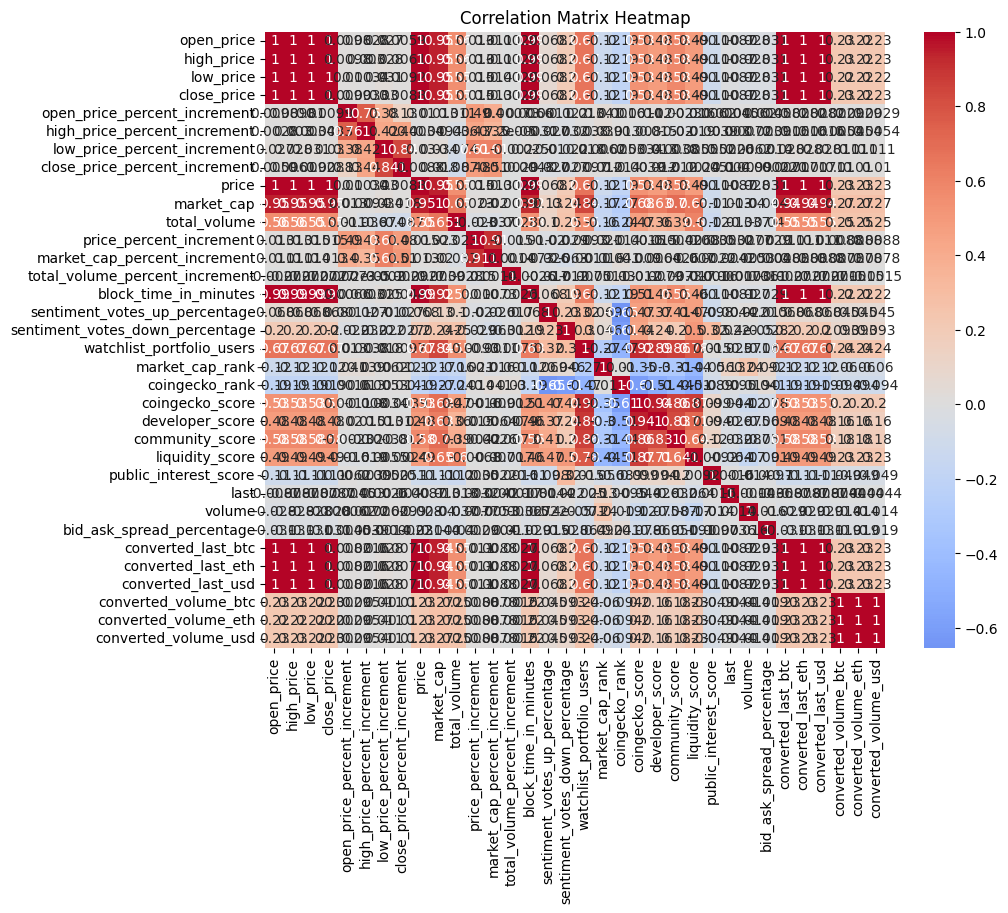

In [58]:
# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_columns = merged_result.select_dtypes(include=[float, int])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [59]:
merged_result.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/merged_result.csv', mode='w', index=False)

________________________________________

### top_criptos_df:

In [60]:
top_criptos_df.head(15)

,crip_id,market_cap_percentage,total_market_cap,total_volume
0,btc,46.384958,4.199088e+07,1.212169e+06
1,eth,18.129292,6.631064e+08,1.914219e+07
2,bnb,3.053040,5.040535e+09,1.455074e+08
3,xrp,2.467482,2.146378e+12,6.196046e+10


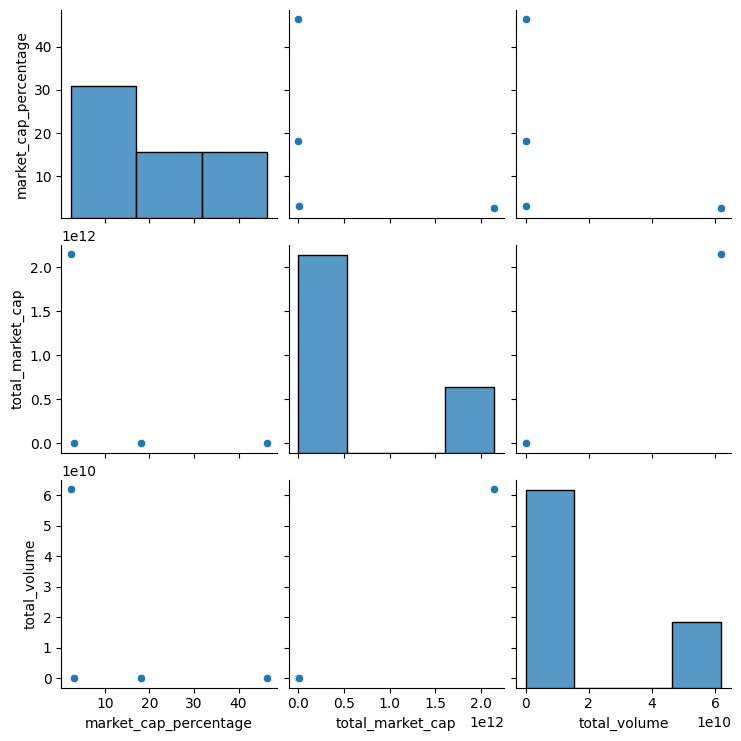

In [61]:
sns.pairplot(top_criptos_df)

### Timestamp

In [62]:
df_list = [ohlc_prices_df, prices_df, tickers_resume_df]  # Coloca aquí tus DataFrames

# Concatenar los DataFrames en uno solo
combined_df = pd.concat(df_list, ignore_index=True)

# Obtener los valores únicos de la columna 'timestamp'
unique_timestamps = combined_df['timestamp'].unique()

# Crear un nuevo DataFrame con los valores únicos de 'timestamp'
unique_timestamps_df = pd.DataFrame({'timestamp': unique_timestamps})


# Imprimir el nuevo DataFrame
print(unique_timestamps_df)


                timestamp
0     2023-08-07 04:00:00
1     2023-08-07 08:00:00
2     2023-08-07 12:00:00
3     2023-08-07 16:00:00
4     2023-08-07 20:00:00
...                   ...
1066  2023-09-06 01:49:42
1067  2023-09-06 01:50:04
1068  2023-09-06 01:52:01
1069  2023-09-06 02:02:41
1070  2023-09-06 02:03:00

[1071 rows x 1 columns]


In [63]:
unique_timestamps_df.head()

,timestamp
0,2023-08-07 04:00:00
1,2023-08-07 08:00:00
2,2023-08-07 12:00:00
3,2023-08-07 16:00:00
4,2023-08-07 20:00:00


In [64]:
# Convertir la columna 'timestamp' a tipo datetime64[ns]
unique_timestamps_df['timestamp'] = pd.to_datetime(unique_timestamps_df['timestamp'])


In [65]:
unique_timestamps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1071 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.5 KB


In [66]:
unique_timestamps_df = unique_timestamps_df.drop_duplicates()
unique_timestamps_df = unique_timestamps_df.dropna()

In [67]:
unique_timestamps_df.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/unique_timestamps_df.csv', mode='w', index=False)

### Timestamp2:

In [68]:
df_list2 = [df_bit, df_eth,unique_timestamps_df]  # Coloca aquí tus DataFrames

# Concatenar los DataFrames en uno solo
combined_df2 = pd.concat(df_list2, ignore_index=True)

# Obtener los valores únicos de la columna 'timestamp'
unique_timestamps2 = combined_df2['timestamp'].unique()

# Crear un nuevo DataFrame con los valores únicos de 'timestamp'
unique_timestamps_df2 = pd.DataFrame({'timestamp': unique_timestamps2})


# Imprimir el nuevo DataFrame
print(unique_timestamps_df2)


                    timestamp
0     2013-04-28 00:00:00.000
1     2013-04-29 00:00:00.000
2     2013-04-30 00:00:00.000
3     2013-05-01 00:00:00.000
4     2013-05-02 00:00:00.000
...                       ...
4852      2023-09-06 01:49:42
4853      2023-09-06 01:50:04
4854      2023-09-06 01:52:01
4855      2023-09-06 02:02:41
4856      2023-09-06 02:03:00

[4857 rows x 1 columns]


In [69]:
unique_timestamps_df2.head()

,timestamp
0,2013-04-28 00:00:00.000
1,2013-04-29 00:00:00.000
2,2013-04-30 00:00:00.000
3,2013-05-01 00:00:00.000
4,2013-05-02 00:00:00.000


In [70]:
# Convertir la columna 'timestamp' a tipo datetime64[ns]
unique_timestamps_df2['timestamp'] = pd.to_datetime(unique_timestamps_df2['timestamp'])


In [71]:
unique_timestamps_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857 entries, 0 to 4856
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  4857 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.1 KB


In [72]:
unique_timestamps_df2 = unique_timestamps_df2.drop_duplicates()
unique_timestamps_df2 = unique_timestamps_df2.dropna()

In [73]:
unique_timestamps_df2.to_csv('../EDA_ETL_Hybrid_analisis_Csvs_Cleaned/unique_timestamps_df2.csv', mode='w', index=False)